# Import Modules

In [254]:
import numpy as np
import pandas as pd
import tensorflow as tf

import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.utils.set_random_seed(42)


# BLOSUM62

In [255]:
# Define BLOSUM62 matrix as a dictionary of dictionaries
blosum62 = {
    'A': {'A': 4, 'R': -1, 'N': -2, 'D': -2, 'C': 0, 'Q': -1, 'E': -1, 'G': 0, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 0, 'W': -3, 'Y': -2, 'V': 0},
    'R': {'A': -1, 'R': 5, 'N': 0, 'D': -2, 'C': -3, 'Q': 1, 'E': 0, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 2, 'M': -1, 'F': -3, 'P': -2, 'S': -1, 'T': -1, 'W': -3, 'Y': -2, 'V': -3},
    'N': {'A': -2, 'R': 0, 'N': 6, 'D': 1, 'C': -3, 'Q': 0, 'E': 0, 'G': 0, 'H': 1, 'I': -3, 'L': -3, 'K': 0, 'M': -2, 'F': -3, 'P': -2, 'S': 1, 'T': 0, 'W': -4, 'Y': -2, 'V': -3},
    'D': {'A': -2, 'R': -2, 'N': 1, 'D': 6, 'C': -3, 'Q': 0, 'E': 2, 'G': -1, 'H': -1, 'I': -3, 'L': -4, 'K': -1, 'M': -3, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -4, 'Y': -3, 'V': -3},
    'C': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': 9, 'Q': -3, 'E': -4, 'G': -3, 'H': -3, 'I': -1, 'L': -1, 'K': -3, 'M': -1, 'F': -2, 'P': -3, 'S': -1, 'T': -1, 'W': -2, 'Y': -2, 'V': -1},
    'Q': {'A': -1, 'R': 1, 'N': 0, 'D': 0, 'C': -3, 'Q': 5, 'E': 2, 'G': -2, 'H': 0, 'I': -3, 'L': -2, 'K': 1, 'M': 0, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -2, 'Y': -1, 'V': -2},
    'E': {'A': -1, 'R': 0, 'N': 0, 'D': 2, 'C': -4, 'Q': 2, 'E': 5, 'G': -2, 'H': 0, 'I': -3, 'L': -3, 'K': 1, 'M': -2, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2},
    'G': {'A': 0, 'R': -2, 'N': 0, 'D': -1, 'C': -3, 'Q': -2, 'E': -2, 'G': 6, 'H': -2, 'I': -4, 'L': -4, 'K': -2, 'M': -3, 'F': -3, 'P': -2, 'S': 0, 'T': -2, 'W': -2, 'Y': -3, 'V': -3},
    'H': {'A': -2, 'R': 0, 'N': 1, 'D': -1, 'C': -3, 'Q': 0, 'E': 0, 'G': -2, 'H': 8, 'I': -3, 'L': -3, 'K': -1, 'M': -2, 'F': -1, 'P': -2, 'S': -1, 'T': -2, 'W': -2, 'Y': 2, 'V': -3},
    'I': {'A': -1, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -3, 'E': -3, 'G': -4, 'H': -3, 'I': 4, 'L': 2, 'K': -3, 'M': 1, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -3, 'Y': -1, 'V': 3},
    'L': {'A': -1, 'R': -2, 'N': -3, 'D': -4, 'C': -1, 'Q': -2, 'E': -3, 'G': -4, 'H': -3, 'I': 2, 'L': 4, 'K': -2, 'M': 2, 'F': 0, 'P': -3, 'S': -2, 'T': -1, 'W': -2, 'Y': -1, 'V': 1},
    'K': {'A': -1, 'R': 2, 'N': 0, 'D': -1, 'C': -3, 'Q': 1, 'E': 1, 'G': -2, 'H': -1, 'I': -3, 'L': -2, 'K': 5, 'M': -1, 'F': -3, 'P': -1, 'S': 0, 'T': -1, 'W': -3, 'Y': -2, 'V': -2},
    'M': {'A': -1, 'R': -1, 'N': -2, 'D': -3, 'C': -1, 'Q': 0, 'E': -2, 'G': -3, 'H': -2, 'I': 1, 'L': 2, 'K': -1, 'M': 5, 'F': 0, 'P': -2, 'S': -1, 'T': -1, 'W': -1, 'Y': -1, 'V': 1},
    'F': {'A': -2, 'R': -3, 'N': -3, 'D': -3, 'C': -2, 'Q': -3, 'E': -3, 'G': -3, 'H': -1, 'I': 0, 'L': 0, 'K': -3, 'M': 0, 'F': 6, 'P': -4, 'S': -2, 'T': -2, 'W': 1, 'Y': 3, 'V': -1},
    'P': {'A': -1, 'R': -2, 'N': -2, 'D': -1, 'C': -3, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -3, 'L': -3, 'K': -1, 'M': -2, 'F': -4, 'P': 7, 'S': -1, 'T': -1, 'W': -4, 'Y': -3, 'V': -2},
    'S': {'A': 1, 'R': -1, 'N': 1, 'D': 0, 'C': -1, 'Q': 0, 'E': 0, 'G': 0, 'H': -1, 'I': -2, 'L': -2, 'K': 0, 'M': -1, 'F': -2, 'P': -1, 'S': 4, 'T': 1, 'W': -3, 'Y': -2, 'V': -2},
    'T': {'A': 0, 'R': -1, 'N': 0, 'D': -1, 'C': -1, 'Q': -1, 'E': -1, 'G': -2, 'H': -2, 'I': -1, 'L': -1, 'K': -1, 'M': -1, 'F': -2, 'P': -1, 'S': 1, 'T': 5, 'W': -2, 'Y': -2, 'V': 0},
    'W': {'A': -3, 'R': -3, 'N': -4, 'D': -4, 'C': -2, 'Q': -2, 'E': -3, 'G': -2, 'H': -2, 'I': -3, 'L': -2, 'K': -3, 'M': -1, 'F': 1, 'P': -4, 'S': -3, 'T': -2, 'W': 11, 'Y': 2, 'V': -3},
    'Y': {'A': -2, 'R': -2, 'N': -2, 'D': -3, 'C': -2, 'Q': -1, 'E': -2, 'G': -3, 'H': 2, 'I': -1, 'L': -1, 'K': -2, 'M': -1, 'F': 3, 'P': -3, 'S': -2, 'T': -2, 'W': 2, 'Y': 7, 'V': -1},
    'V': {'A': 0, 'R': -3, 'N': -3, 'D': -3, 'C': -1, 'Q': -2, 'E': -2, 'G': -3, 'H': -3, 'I': 3, 'L': 1, 'K': -2, 'M': 1, 'F': -1, 'P': -2, 'S': -2, 'T': 0, 'W': -3, 'Y': -1, 'V': 4}
}


{'A': ['S'], 'R': ['Q', 'K'], 'N': ['D', 'H', 'S'], 'D': ['N', 'E'], 'C': [], 'Q': ['R', 'E', 'K'], 'E': ['D', 'Q', 'K'], 'G': [], 'H': ['N', 'Y'], 'I': ['L', 'M', 'V'], 'L': ['I', 'M', 'V'], 'K': ['R', 'Q', 'E'], 'M': ['I', 'L', 'V'], 'F': ['W', 'Y'], 'P': [], 'S': ['A', 'N', 'T'], 'T': ['S'], 'W': ['F', 'Y'], 'Y': ['H', 'F', 'W'], 'V': ['I', 'L', 'M']}


# Augmentation Methods

In [256]:
# Create conservative substitution dictionary based on a threshold
def create_conservative_dict(matrix, threshold=1):
    # Create a dictionary to store the conservative substitutions
    substitution_dict = {}
    # Iterate over the rows of the matrix to find conservative substitutions
    for aa1 in matrix:
        substitution_dict[aa1] = [aa2 for aa2, score in matrix[aa1].items() if score >= threshold and aa1 != aa2]
    return substitution_dict

# Create a conservative substitution dictionary based on BLOSUM62 matrix
conservative_substitutions_blosum = create_conservative_dict(blosum62)

# Function to apply conservative mutations
def conservative_mutate_sequence(seq, substitution_dict, mutation_rate=0.05):
    # randomly mutate the sequence based on the substitution dictionary and mutation rate
    mutated_seq = list(seq)
    for i in range(len(seq)):
        if random.random() < mutation_rate:
            if seq[i] in substitution_dict and substitution_dict[seq[i]]:
                mutated_seq[i] = random.choice(substitution_dict[seq[i]])
    return ''.join(mutated_seq)

# Generate augmented sequences by applying conservative mutations. 
def augment_sequences(sequences, substitution_dict, num_augmentations=3, mutation_rate=0.05):
    augmented_sequences = []
    for seq in sequences:
        augmented_sequences.append(seq)  # Include the original sequence
        for _ in range(num_augmentations):
            mutated_seq = conservative_mutate_sequence(seq, substitution_dict, mutation_rate) # Apply conservative mutations
            augmented_sequences.append(mutated_seq) # Include the mutated sequence
    return augmented_sequences

In [257]:
# One-hot encoding function
def one_hot_encode(seq, vocab):
    one_hot = np.zeros((len(seq), len(vocab)), dtype=np.float32)
    for i, char in enumerate(seq):
        if char in vocab:
            one_hot[i, vocab.index(char)] = 1.0
    return one_hot

# Define your vocabularies
aa_vocab = 'ACDEFGHIKLMNPQRSTVWY_'  # 20 amino acids + 1 for gap/unknown
structure_vocab = 'he_'  # h for helix, e for sheet, _ for coil

# Modified prepare_data function with augmentation
def prepare_data(filepath, window_size=13, augment=False, num_augmentations=1, mutation_rate=0.05):
    sequences = []
    structures = []
    current_seq = []
    current_struct = []
    processing_sequence = False  
    
    # Read the file line by line
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if line == '<>':  
                if processing_sequence:  # We are ending a sequence block
                    if current_seq and current_struct:
                        # Augment sequences if required
                        seqs_to_encode = [current_seq]
                        if augment:
                            # Generate augmented sequences
                            seqs_to_encode = augment_sequences([current_seq], conservative_substitutions_blosum, num_augmentations, mutation_rate)

                        for augmented_seq in seqs_to_encode:
                            seq_encoded = one_hot_encode(augmented_seq, aa_vocab)  #One-hot encode sequence
                            struct_encoded = one_hot_encode(current_struct, structure_vocab) # One-hot encode structure

                            # Apply sliding window of determined size
                            for i in range(len(seq_encoded) - window_size + 1):
                                window = seq_encoded[i:i + window_size]
                                label = struct_encoded[i + window_size // 2]
                                sequences.append(window)
                                structures.append(label)

                    current_seq = []
                    current_struct = []
                processing_sequence = not processing_sequence
                continue

            elif 'end' in line: # end of sequence or file
                continue  
            
             # If inside a sequence block, process the sequence
            # handles errors in sequence end lines in the dataset
            if processing_sequence:
                parts = line.split()
                if len(parts) != 2:
                    continue  
                current_seq.append(parts[0])
                current_struct.append(parts[1])

    return np.array(sequences), np.array(structures)

In [318]:
# Set random seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Example paths, replace with your actual file paths
train_path = 'Q_and_s_data/protein-secondary-structure.train.txt'
test_path = 'Q_and_s_data/protein-secondary-structure.test.txt'
#test_path = 'datasets/cb513.txt'


# Prepare augmented training data
x_train, y_train = prepare_data(train_path, augment=True, num_augmentations=10, mutation_rate=0.025)
# Prepare test data without augmentation
x_test, y_test = prepare_data(test_path, augment=False, num_augmentations=0, mutation_rate=0.0)

In [319]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(89210, 13, 21) (89210, 3)
(1714, 13, 21) (1714, 3)


# Model Design and Training

In [320]:
# Set random seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Define the model architecture
hidden_units = 65  # Number of neurons in the hidden layer
model = Sequential([
    Flatten(input_shape=(13, 21)),  # The input shape is the window size x 21
    Dense(hidden_units, activation='sigmoid'),  # Hidden layer with sigmoid activation
    Dense(3, activation='linear')    # Output layer with linear activation for 3 classes
])

# Compile the model
model.compile(optimizer='sgd',  # Stochastic gradient descent to simulate backpropagation
              loss='mean_squared_error',  # Mean Squared Error as the loss function
              metrics=['accuracy'])  # Track accuracy

# Define early stopping callback to stop training when the validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=150,  #  number of epochs large enough to allow for convergence 
    batch_size=32,  # batch size of 32 
    validation_data=(x_test, y_test),  # Use the test set as the validation set
    callbacks=[early_stopping] # Use the early stopping callback

)

# Evaluate the model
final_pred = model.predict(x_test)


Epoch 1/150


c:\Users\tomev\anaconda3\envs\bio-cwk\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - accuracy: 0.5199 - loss: 0.2108 - val_accuracy: 0.5642 - val_loss: 0.1911
Epoch 2/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 732us/step - accuracy: 0.5445 - loss: 0.1900 - val_accuracy: 0.5747 - val_loss: 0.1825
Epoch 3/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 727us/step - accuracy: 0.5706 - loss: 0.1798 - val_accuracy: 0.5875 - val_loss: 0.1763
Epoch 4/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - accuracy: 0.5953 - loss: 0.1724 - val_accuracy: 0.6091 - val_loss: 0.1720
Epoch 5/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.6142 - loss: 0.1672 - val_accuracy: 0.6243 - val_loss: 0.1692
Epoch 6/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.6264 - loss: 0.1638 - val_accuracy: 0.6301 - val_loss: 0.1675
Epoch 7/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.6337 - loss: 0.1617 - val_accuracy: 0.6348 - val_loss: 0.1665
Epoch 8/150
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.6397 - los

# Evaluation

In [321]:
# performance metrics

# Convert probabilities to class labels
y_true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(final_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_labels, predicted_labels)
print("Q3 Score:", round(accuracy * 100, 1), "%") 

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Calculate Matthews Correlation Coefficient for each class
mcc_scores = []
for i in range(3):  # 3 classes: Helix, Sheet, Coil
    # Create binary arrays for each class
    true_binary = (y_true_labels == i).astype(int)
    pred_binary = (predicted_labels == i).astype(int)

    # Calculate MCC and handle cases with constant predictions
    if np.unique(true_binary).size > 1 and np.unique(pred_binary).size > 1:
        mcc = matthews_corrcoef(true_binary, pred_binary)
    else:
        mcc = 0  # Not enough data to compute MCC or one class constant
    mcc_scores.append(mcc)
    print(f"MCC for class {['Helix', 'Sheet', 'Coil'][i]}: {mcc:.2f}")

Q3 Score: 64.8 %
Confusion Matrix:
 [[157  21 257]
 [ 58 106 162]
 [ 61  45 847]]
MCC for class Helix: 0.32
MCC for class Sheet: 0.36
MCC for class Coil: 0.38


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


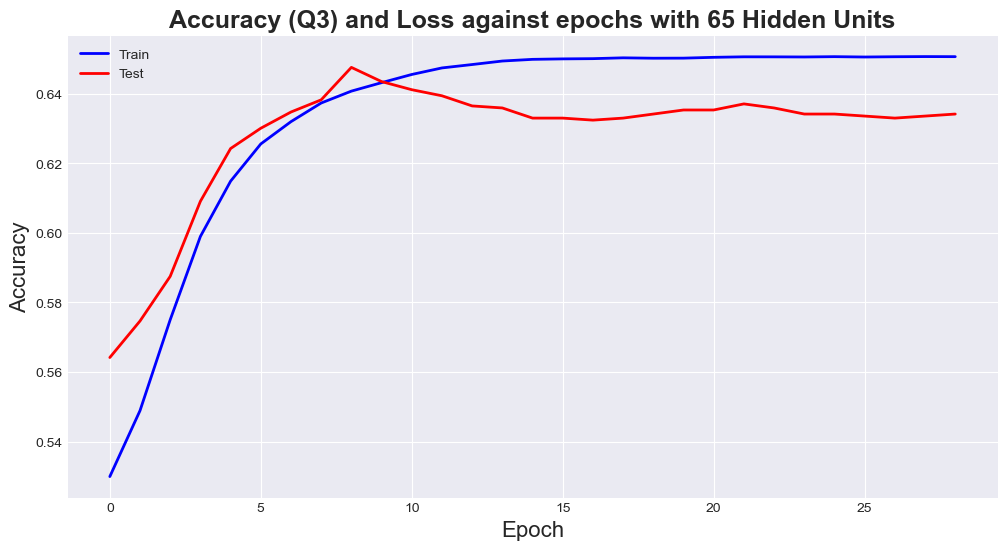

In [322]:
print(plt.style.available)

def plot_history(history):
 # Set the style
    plt.style.use('seaborn-v0_8-dark')  # Using a clean and professional style

    # Create figure and set size
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy
    plt.plot(history.history['accuracy'], linestyle='-', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], linestyle='-', color='red', linewidth=2)
    plt.title('Accuracy (Q3) and Loss against epochs with 65 Hidden Units', fontsize=18, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.grid(True)   
    
    # save the plot
    #plt.savefig('figures/original_model_accuracy_65_units.png',dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

plot_history(history) 
